<a href="https://colab.research.google.com/github/najjouj/machine-learning/blob/main/Mall_customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mall Customers**

Problem Statement

You own the mall and want to understand the customers like who can converge[Target Customers]bsonthat the sense can be given to marketing team and plan the strategy accordingly.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
data=pd.read_csv('/content/Mall_Customers.csv')

## 1- Explore Data

In [4]:
#data.head()
#data.tail()
data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
97,98,Female,27,60,50
54,55,Female,50,43,45
61,62,Male,19,46,55
58,59,Female,27,46,51
143,144,Female,32,76,87
168,169,Female,36,87,27
63,64,Female,54,47,59
57,58,Male,69,44,46
147,148,Female,32,77,74
155,156,Female,27,78,89


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 2- Transform object data

In [34]:
la=LabelEncoder()

In [35]:
data.Gender=la.fit_transform(data.Gender)

In [36]:
data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),k_mean
19,20,0,35,23,98,2
33,34,1,18,33,92,2
192,193,1,33,113,8,0
146,147,1,48,77,36,0
46,47,0,50,40,55,2
43,44,0,31,39,61,2
65,66,1,18,48,59,1
105,106,0,21,62,42,1
97,98,0,27,60,50,1
12,13,0,58,20,15,2


##3- Create Module

In [11]:
#la=StandardScaler()

In [13]:
#xdata=la.fit_transform(data[['Age','Annual Income (k$)','Spending Score (1-100)']])

In [37]:
clustersn=[]
j=[]

In [18]:
for i in range(1,12):
  model=KMeans(n_clusters=i)
  model.fit(data)
  clustersn.append(i)
  model.inertia_
  j.append(model.inertia_)


In [19]:
pd.DataFrame(clustersn,j)

,0
975512.060000,1
387065.713771,2
272125.319057,3
232028.535676,4
157620.971480,5
122628.062406,6
105691.172933,7
94042.533978,8
85660.507795,9
69279.985221,10


Text(0, 0.5, 'Percent of Error')

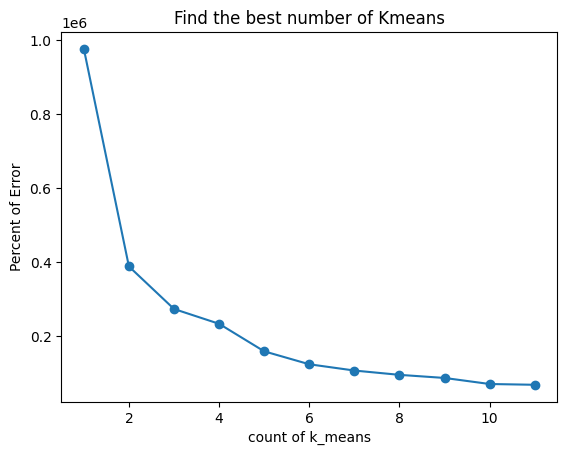

In [23]:
plt.plot(clustersn,j,marker='o')
plt.title('Find the best number of Kmeans')
plt.xlabel('count of k_means')
plt.ylabel('Percent of Error')

In [24]:
model=KMeans(n_clusters=4)
model.fit(data)
pre=model.predict(data)

In [25]:
data['k_mean']=pre

In [26]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),k_mean
0,1,1,19,15,39,2
1,2,1,21,15,81,2
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,3
196,197,0,45,126,28,0
197,198,1,32,126,74,3
198,199,1,32,137,18,0


In [27]:
df1=data[data['k_mean']==0]
df2=data[data['k_mean']==1]
df3=data[data['k_mean']==2]
df4=data[data['k_mean']==3]

In [28]:
df1.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'k_mean'],
      dtype='object')

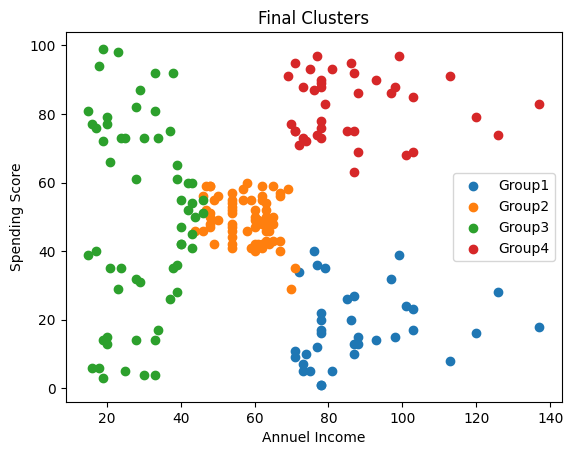

In [31]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label='Group1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label='Group2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label='Group3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label='Group4')
plt.title('Final Clusters')
plt.xlabel('Annuel Income')
plt.ylabel('Spending Score')
plt.legend()

In [38]:
la=StandardScaler()
xdata=la.fit_transform(data[['Age','Annual Income (k$)','Spending Score (1-100)']])

In [39]:
clustersn=[]
j=[]
for i in range(1,12):
  model=KMeans(n_clusters=i)
  model.fit(xdata)
  clustersn.append(i)
  model.inertia_
  j.append(model.inertia_)

Text(0, 0.5, 'Percent of Error')

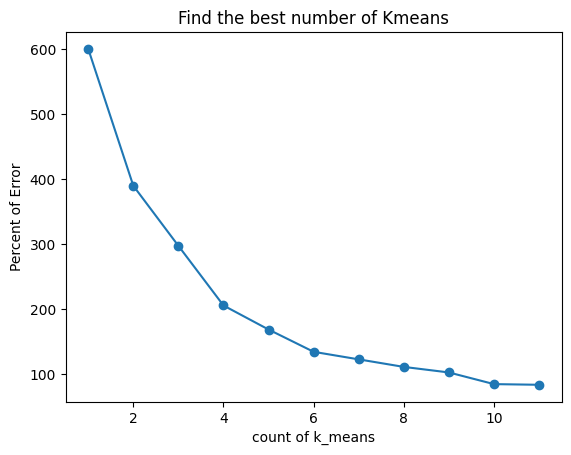

In [40]:
plt.plot(clustersn,j,marker='o')
plt.title('Find the best number of Kmeans')
plt.xlabel('count of k_means')
plt.ylabel('Percent of Error')

In [43]:
model=KMeans(n_clusters=4)
model.fit(data)
pre=model.predict(data)

In [44]:
data['k_mean']=pre

In [45]:
df1=data[data['k_mean']==0]
df2=data[data['k_mean']==1]
df3=data[data['k_mean']==2]
df4=data[data['k_mean']==3]

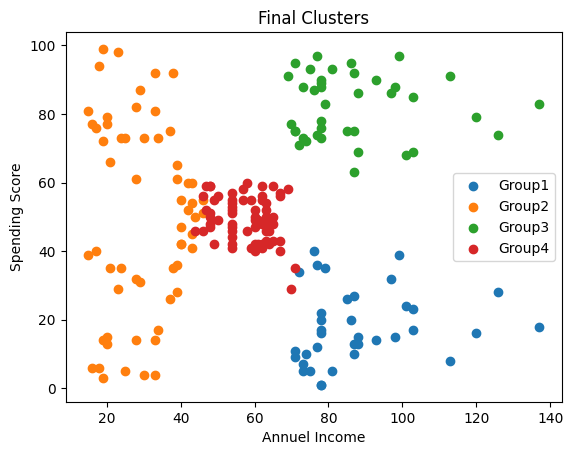

In [46]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label='Group1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label='Group2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label='Group3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label='Group4')
plt.title('Final Clusters')
plt.xlabel('Annuel Income')
plt.ylabel('Spending Score')
plt.legend()

##Data Analysis

<Axes: xlabel='k_mean', ylabel='count'>

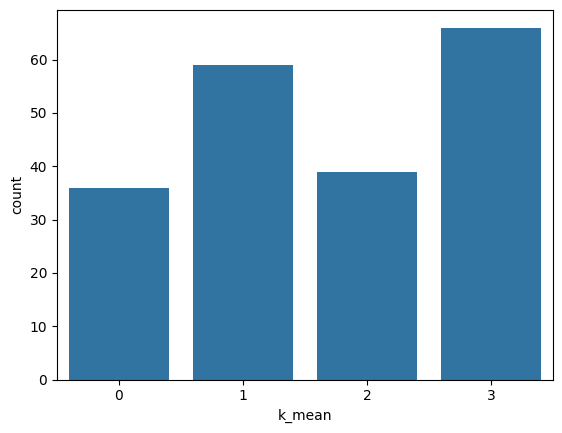

In [51]:
sns.countplot(x='k_mean',data=data)

<Axes: ylabel='count'>

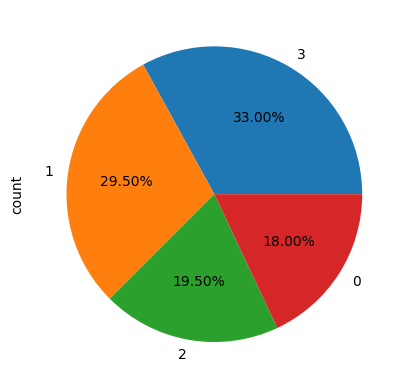

In [56]:
data['k_mean'].value_counts().plot.pie(autopct='%0.2f%%')

<Axes: xlabel='k_mean', ylabel='Spending Score (1-100)'>

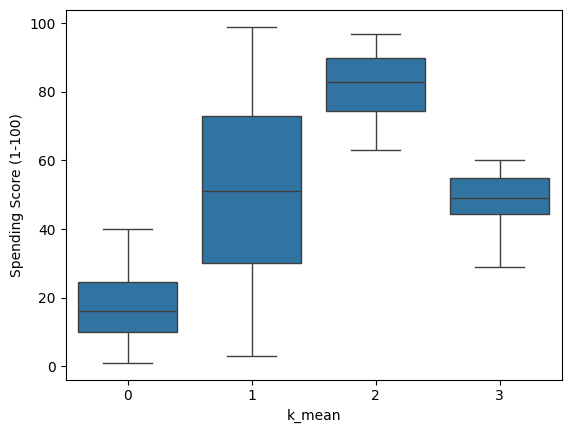

In [59]:
sns.boxplot(x=data.k_mean,y=data['Spending Score (1-100)'],data=data)

<Axes: xlabel='Age', ylabel='Count'>

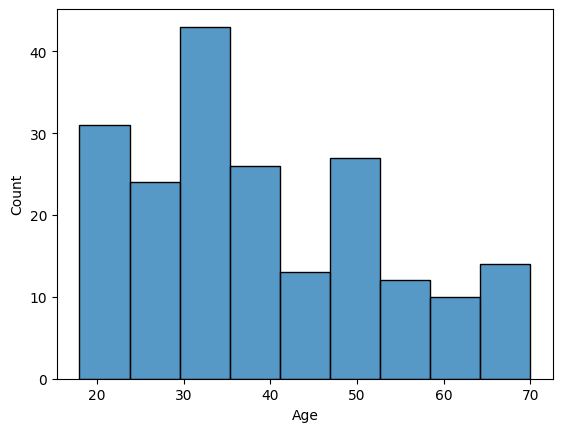

In [64]:
sns.histplot(x='Age',data=data)

<Axes: xlabel='k_mean', ylabel='count'>

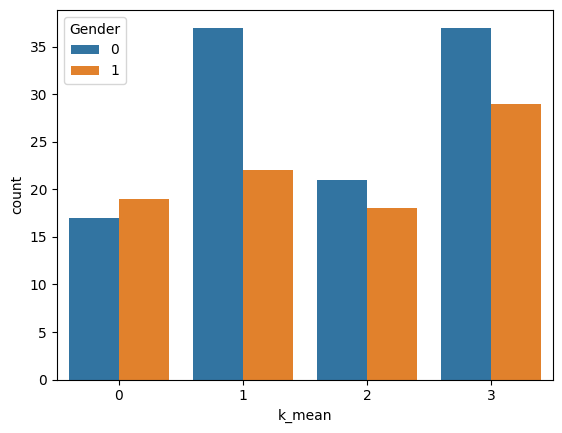

In [65]:
sns.countplot(x='k_mean',data=data,hue='Gender')

<Axes: xlabel='Gender', ylabel='count'>

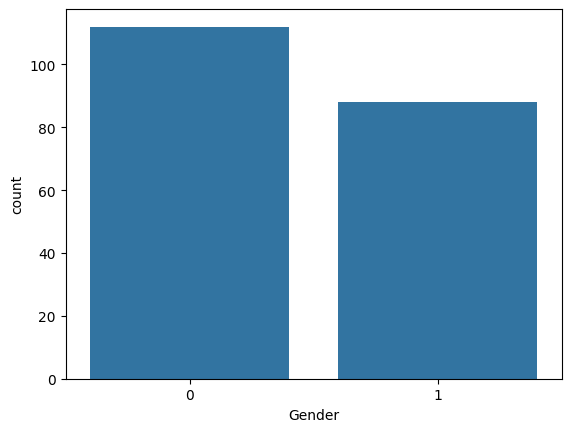

In [66]:
sns.countplot(x='Gender',data=data)